# Konda Pavan Kumar Project of Telecom Churn Prediction

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [413]:
telecom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [414]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [416]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [417]:
telecom.shape

(7043, 21)

In [418]:
telecom.shape

(7043, 21)

In [419]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [420]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [421]:
telecom.isnull().sum()*100/telecom.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Total Charges

In [422]:
telecom['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [423]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ',np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [424]:
# Total Charges will be related to Monthly Charges.
# We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [425]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [426]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [427]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Exploratory Data Analytics

Univariate Analysis

Churn(Target Variable)

In [428]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

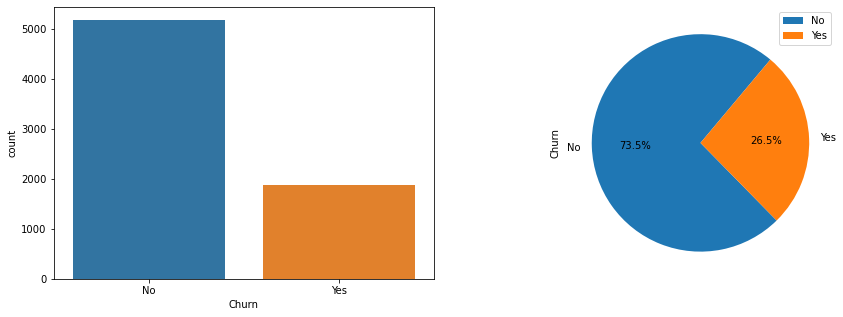

In [429]:
fig,axs = plt.subplots(1,2,figsize = (15,5))
plt1 = sns.countplot(telecom['Churn'],ax = axs[0])
pie_churn = pd.DataFrame(telecom['Churn'].value_counts())
pie_churn.plot.pie(subplots=True,label = pie_churn.index.values,autopct='%1.1f%%',figsize = (15,5),startangle=50,ax = axs[1])

plt.gca().set_aspect('equal')
plt.show()

In [430]:
#we have a data with 26.5% churn rate

In [431]:
#this time for which a customer has been using the service

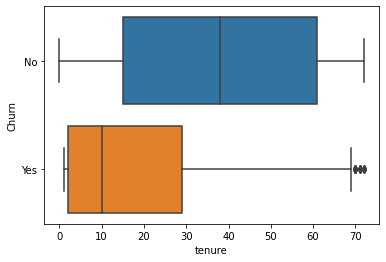

In [432]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

In [433]:
#customer with more tenure tends to churn less

Phone Service

In [434]:
#whether a customer has a landline phone service along with the internet service

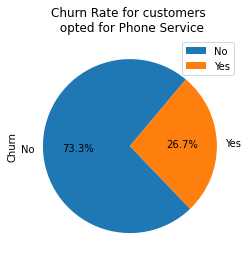

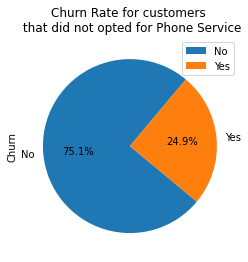

In [435]:
pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')
plt.show()

In [436]:
#Opting for phone service doesnot have a  significant impact on churn rate

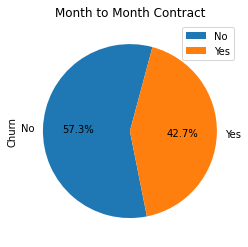

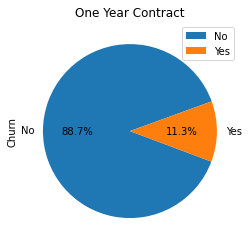

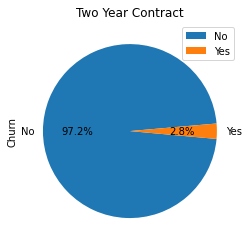

In [437]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

In [438]:
#customer with one year and two year contract tends to churn a lot lesser than month to month contract

#Paperless Billing

<Figure size 1080x360 with 0 Axes>

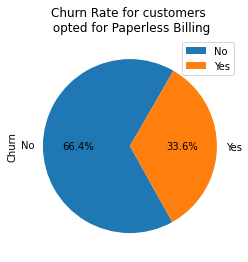

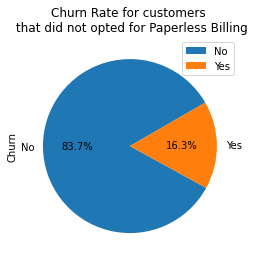

In [439]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')

pie_PaperlessBilling_No = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

In [440]:
#churn Rate is higher than the customers who opted for paperless billing

#Payment Method

In [441]:
telecom.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

<Figure size 1080x720 with 0 Axes>

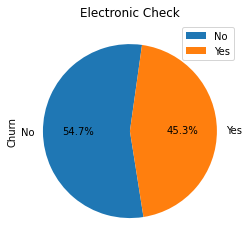

In [442]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

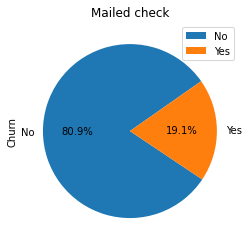

In [443]:
pie_PaymentMethod_mc = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

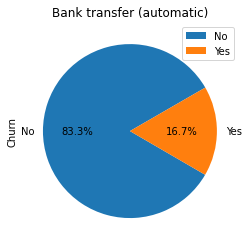

In [444]:
pie_PaymentMethod_bta = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

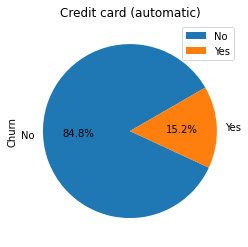

In [445]:
pie_PaymentMethod_cca = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

In [446]:
# Customers with Electronic check tends to churn more than other payment methods

In [447]:
#Monthly Charges


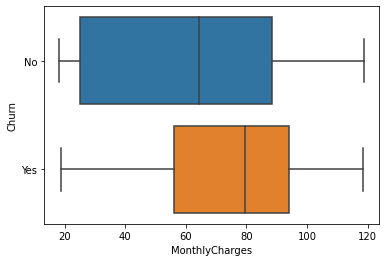

In [448]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

In [449]:
# Median monthly charges are higher for customers who have churned.

#Total Charges

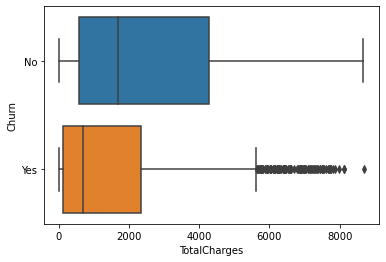

In [450]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

In [451]:
# Median Total charges are low for customers who have churned.

#Gender

<Figure size 1080x360 with 0 Axes>

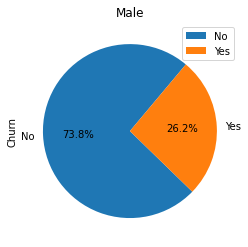

In [453]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(telecom[telecom['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')


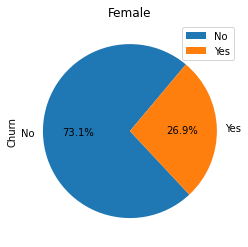

In [454]:
pie_Gender_F = pd.DataFrame(telecom[telecom['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 

#Senior Citizen

<Figure size 1080x360 with 0 Axes>

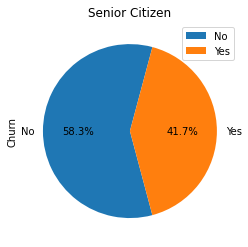

In [456]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

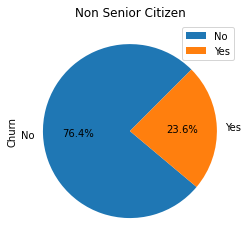

In [458]:
pie_SeniorCitizen_N = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show() 

In [234]:
# Senior Citizens tends to churn more.

#partner

<Figure size 1080x360 with 0 Axes>

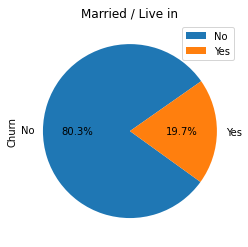

In [459]:
plt.figure(figsize=(15,5))
pie_Partner_Y = pd.DataFrame(telecom[telecom['Partner'] == 'Yes']['Churn'].value_counts())
pie_Partner_Y.plot.pie(subplots = True,  labels = pie_Partner_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

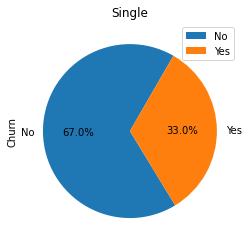

In [460]:
pie_Partner_N = pd.DataFrame(telecom[telecom['Partner'] == 'No']['Churn'].value_counts())
pie_Partner_N.plot.pie(subplots = True,  labels = pie_Partner_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show() 

#Dependents

<Figure size 1080x360 with 0 Axes>

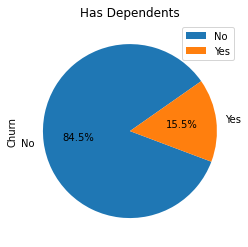

In [461]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(telecom[telecom['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

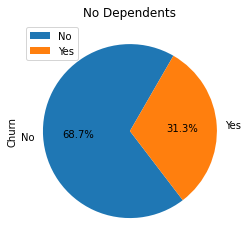

In [462]:
pie_Dependents_N = pd.DataFrame(telecom[telecom['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

In [239]:
#Customers with no deoendents tends to churn more

#Multiple Lines

In [240]:
#whether a customer lines of internet connectivity

<Figure size 1080x360 with 0 Axes>

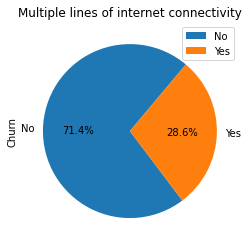

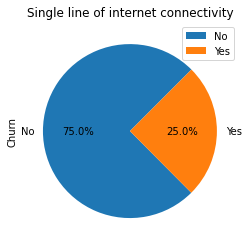

In [464]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')


pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

In [242]:
# Multiple lines of internet connectivity doesn't effect churn that much.

#Internet Service

<Figure size 1080x360 with 0 Axes>

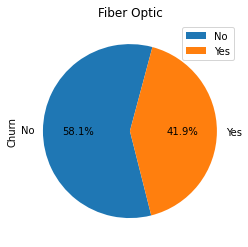

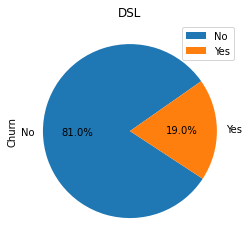

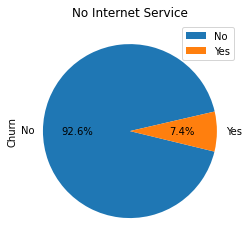

In [467]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()


In [244]:
# Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

Online Security

<Figure size 1080x360 with 0 Axes>

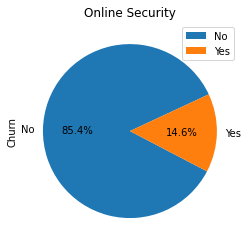

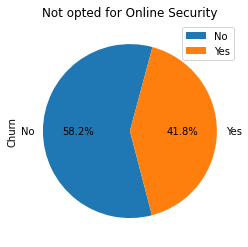

In [469]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values, autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 

In [246]:
# Customers opted for Online Security churn less than who have not opted.

Online Backup

<Figure size 1080x360 with 0 Axes>

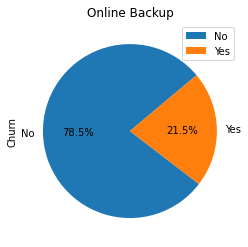

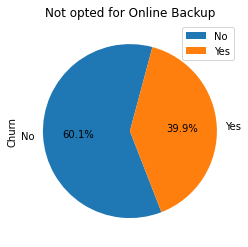

In [471]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 

In [248]:
# Customers opted for Online Backup churn less than who have not opted

Device protection

<Figure size 1080x360 with 0 Axes>

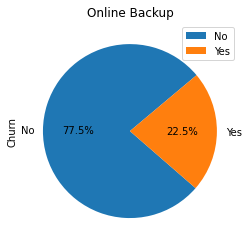

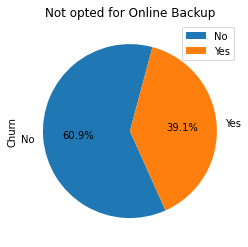

In [473]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show() 

In [250]:
# Customers opted for Device Potection churn less than who have not opted.

Tech Support

<Figure size 1080x360 with 0 Axes>

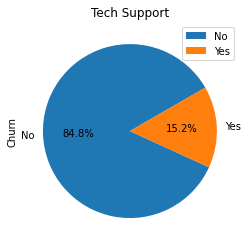

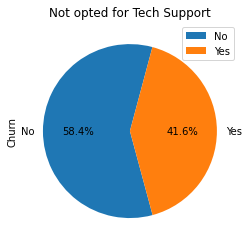

In [476]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(telecom[telecom['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(telecom[telecom['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show() 

In [252]:
# Customers opted for Tech Support churn less than who have not opted.

Streaming TV

<Figure size 1080x360 with 0 Axes>

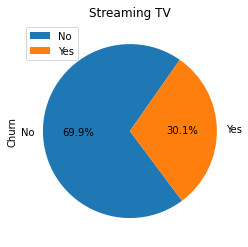

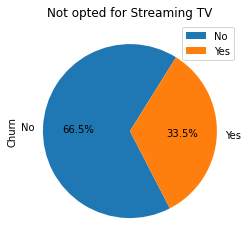

In [477]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(telecom[telecom['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(telecom[telecom['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 

In [254]:
# Streaming TV doesn't make such impact on churning.

Streaming Movies

<Figure size 1080x360 with 0 Axes>

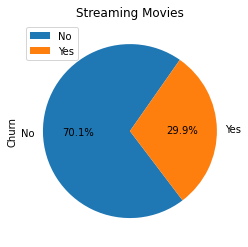

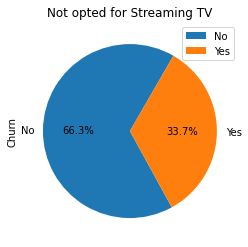

In [478]:
plt.figure(figsize=(15,5))
pie_StreamingMovies_Y = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'Yes']['Churn'].value_counts())
pie_StreamingMovies_Y.plot.pie(subplots = True, labels = pie_StreamingMovies_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

pie_StreamingMovies_N = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'No']['Churn'].value_counts())
pie_StreamingMovies_N.plot.pie(subplots = True, labels = pie_StreamingMovies_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()

# Model Building

Data preparation

Converting Some binary variables (yes/no) to 0/1

In [479]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [480]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [482]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [483]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [484]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [485]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


Dropping the repeated variables

In [486]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [487]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Checking for outliers

In [488]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [489]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


Checking for missing values and imputing them

In [490]:
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [491]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [492]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [493]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Step 4 : Train - Test Split

In [494]:
from sklearn.model_selection import train_test_split

In [495]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [498]:
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [499]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 5 : Feature Scaling

In [500]:
from sklearn.preprocessing import StandardScaler

In [501]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [502]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We Have almost 27% churn rate

Step 6: Looking at Correlations

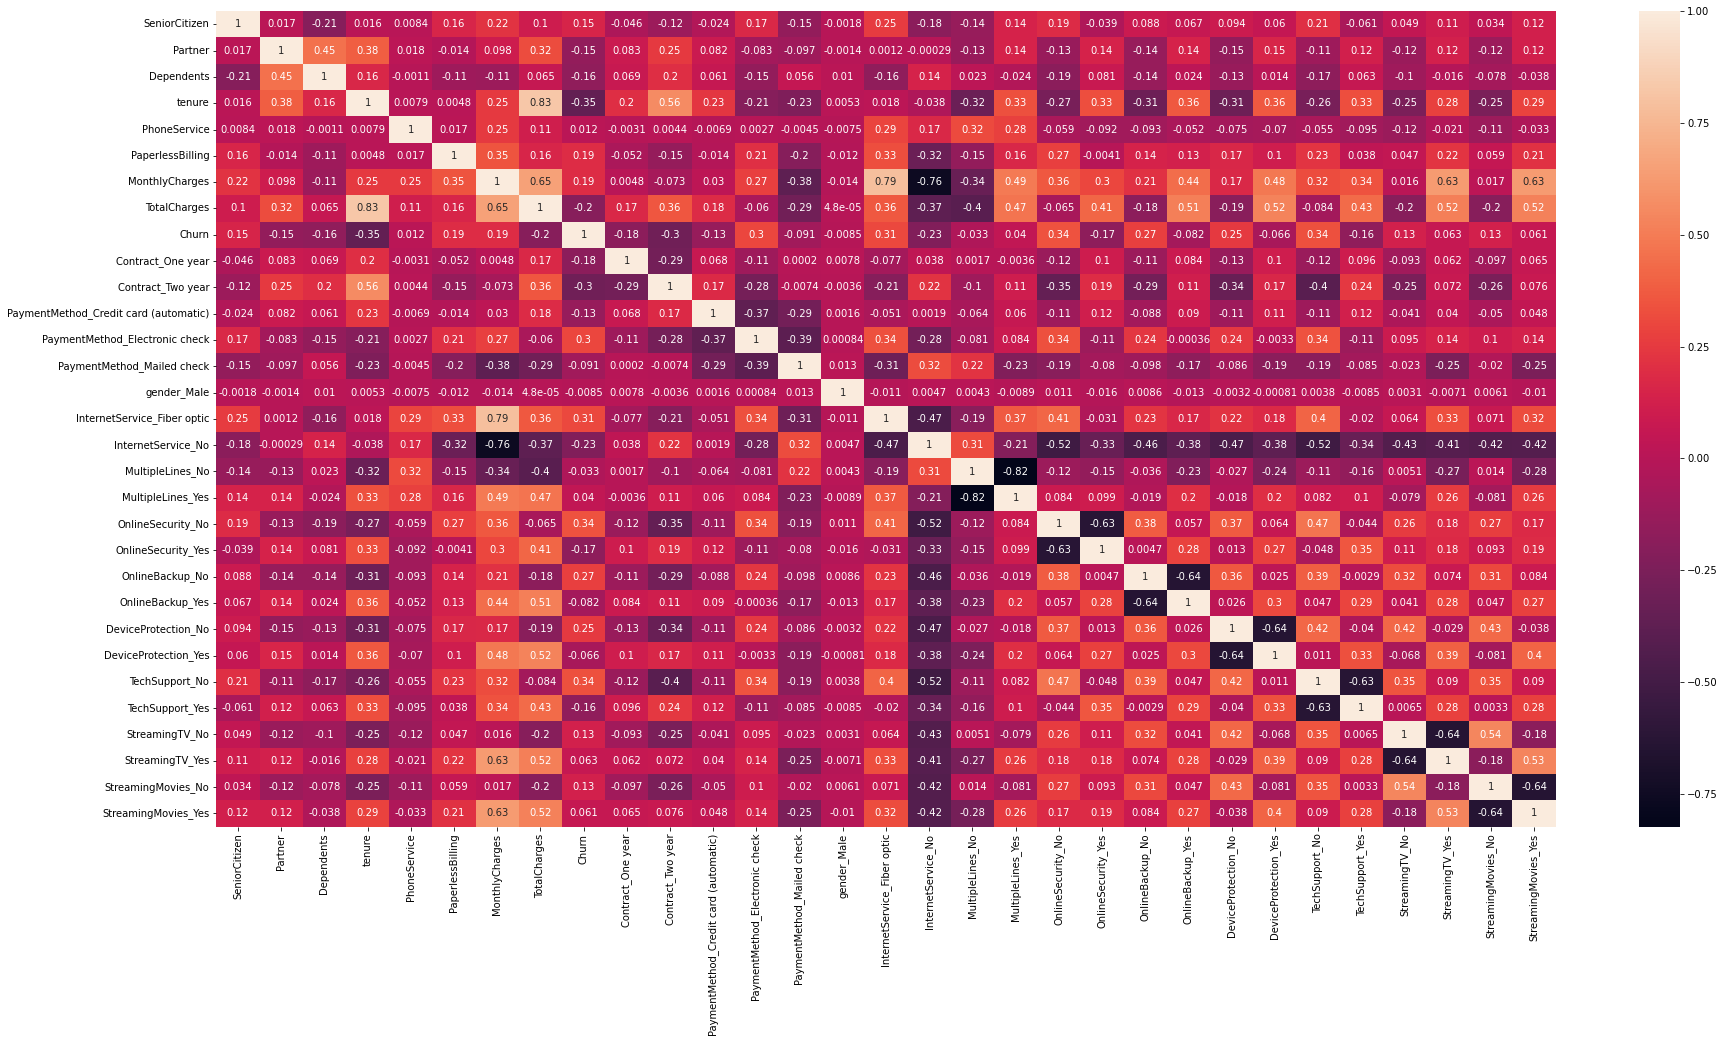

In [503]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [504]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

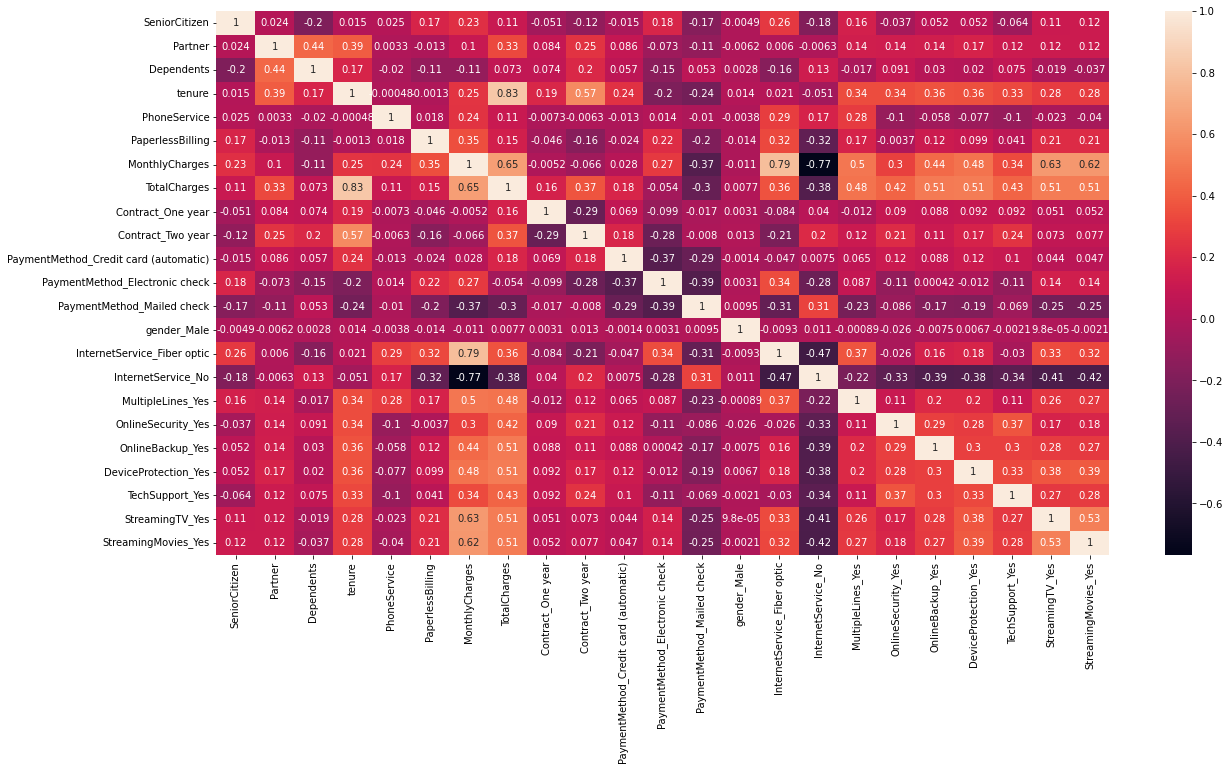

In [505]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Step 7: Model Building

Running your First Training Model

In [506]:
import statsmodels.api as sm

In [507]:
# Logstic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 29 Jun 2023   Deviance:                       4009.4
Time:                        13:36:02   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

Step 8 : Feature Selection uisng RFE

In [508]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [509]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [510]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [511]:
col = X_train.columns

In [512]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [513]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 29 Jun 2023   Deviance:                       4009.4
Time:                        13:36:11   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [514]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 29 Jun 2023   Deviance:                       4009.4
Time:                        13:36:11   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [515]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.189138
5790    0.248281
6498    0.617278
880     0.483538
2784    0.633491
3874    0.468383
5387    0.427914
6623    0.790771
4465    0.250411
5364    0.522212
dtype: float64

In [516]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18913768, 0.24828097, 0.61727801, 0.48353791, 0.63349089,
       0.46838307, 0.42791402, 0.79077092, 0.25041123, 0.5222123 ])

In [517]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.189138,879
1,0,0.248281,5790
2,1,0.617278,6498
3,1,0.483538,880
4,1,0.633491,2784


In [518]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.189138,879,0
1,0,0.248281,5790,0
2,1,0.617278,6498,1
3,1,0.483538,880,0
4,1,0.633491,2784,1


In [519]:
from sklearn import metrics

In [520]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3268  367]
 [ 576  711]]


In [521]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8084112149532711


In [522]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [523]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,MonthlyCharges,17.81
7,TotalCharges,10.88
4,PhoneService,10.30
14,InternetService_Fiber optic,7.66
3,tenure,7.63
15,InternetService_No,6.91
9,Contract_Two year,3.50
21,StreamingTV_Yes,3.02
22,StreamingMovies_Yes,3.01
5,PaperlessBilling,2.96


In [524]:
col = col.drop('PhoneService', 1)
col

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [525]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2005.4
Date:                Thu, 29 Jun 2023   Deviance:                       4010.8
Time:                        13:36:17   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.1031      0.266     -7.921      0.000      -2.623      -1.583
SeniorCitizen                             0.3939      0.101      3.883      0.000       0.195       0.593
Partner                                   0.0410      0.094      0.438      0.661      -0.142       0.224
Dependents                               -0.1456      0.107     -1.358      0.174      -0.356       0.065
tenure                                   -1.5142      0.189     -8.017      0.000      -1.884      -1.144
PaperlessBilling                          0.3279      0.090      3.642      0.000       0.151       0.504
MonthlyCharges                           -0.8130      0.239     -3.401      0.001      -1.282      -0.344
TotalCharges                              0.7282      0.197      3.688      0.000       0.341       1.115
Contract_One year                        -0.6609      0.129     -5.131      0.000      -0.913      -0.408
Contract_Two year                        -1.2438      0.212     -5.866      0.000      -1.659      -0.828
PaymentMethod_Credit card (automatic)    -0.2583      0.137     -1.888      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1604      0.113      1.425      0.154      -0.060       0.381
PaymentMethod_Mailed check               -0.2529      0.137     -1.840      0.066      -0.522       0.017
gender_Male                              -0.0349      0.078     -0.446      0.655      -0.188       0.118
InternetService_Fiber optic               1.3905      0.259      5.361      0.000       0.882       1.899
InternetService_No                       -1.6272      0.223     -7.286      0.000      -2.065      -1.189
MultipleLines_Yes                         0.3406      0.109      3.123      0.002       0.127       0.554
OnlineSecurity_Yes                       -0.2491      0.110     -2.268      0.023      -0.464      -0.034
OnlineBackup_Yes                         -0.0516      0.099     -0.521      0.602      -0.245       0.142
DeviceProtection_Yes                      0.0942      0.101      0.930      0.352      -0.104       0.293
TechSupport_Yes                          -0.2548      0.111     -2.301      0.021      -0.472      -0.038
StreamingTV_Yes                           0.5054      0.121      4.182      0.000       0.269       0.742
StreamingMovies_Yes                       0.3935      0.119      3.307      0.001       0.160       0.627
=========================================================================================================
"""

In [526]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [527]:
y_train_pred[:10]

array([0.18582619, 0.26135375, 0.64197034, 0.48620558, 0.61344979,
       0.4507622 , 0.44023487, 0.80172932, 0.25515495, 0.5311307 ])

In [528]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [529]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.185826,879,0
1,0,0.261354,5790,0
2,1,0.641970,6498,1
3,1,0.486206,880,0
4,1,0.613450,2784,1


In [530]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8082080455099553


In [531]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,MonthlyCharges,17.38
6,TotalCharges,10.72
3,tenure,7.57
13,InternetService_Fiber optic,7.33
14,InternetService_No,5.61
8,Contract_Two year,3.42
21,StreamingMovies_Yes,3.01
20,StreamingTV_Yes,3.01
4,PaperlessBilling,2.85
10,PaymentMethod_Electronic check,2.78


In [532]:
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [533]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4900
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.5
Date:                Thu, 29 Jun 2023   Deviance:                       4025.1
Time:                        13:36:21   Pearson chi2:                 5.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0608      0.262     -7.858      0.000      -2.575      -1.547
SeniorCitizen                             0.4020      0.102      3.946      0.000       0.202       0.602
Partner                                   0.0401      0.094      0.429      0.668      -0.143       0.223
Dependents                               -0.1604      0.107     -1.496      0.135      -0.370       0.050
tenure                                   -0.8829      0.071    -12.432      0.000      -1.022      -0.744
PaperlessBilling                          0.3170      0.090      3.530      0.000       0.141       0.493
MonthlyCharges                           -0.5832      0.227     -2.571      0.010      -1.028      -0.139
Contract_One year                        -0.6592      0.128     -5.155      0.000      -0.910      -0.409
Contract_Two year                        -1.2108      0.209     -5.780      0.000      -1.621      -0.800
PaymentMethod_Credit card (automatic)    -0.2571      0.137     -1.880      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1714      0.113      1.521      0.128      -0.050       0.392
PaymentMethod_Mailed check               -0.1950      0.136     -1.435      0.151      -0.461       0.071
gender_Male                              -0.0327      0.078     -0.418      0.676      -0.186       0.121
InternetService_Fiber optic               1.3550      0.255      5.306      0.000       0.854       1.856
InternetService_No                       -1.4676      0.216     -6.807      0.000      -1.890      -1.045
MultipleLines_Yes                         0.3549      0.109      3.263      0.001       0.142       0.568
OnlineSecurity_Yes                       -0.2438      0.110     -2.221      0.026      -0.459      -0.029
OnlineBackup_Yes                         -0.0304      0.099     -0.308      0.758      -0.223       0.163
DeviceProtection_Yes                      0.1038      0.101      1.028      0.304      -0.094       0.302
TechSupport_Yes                          -0.2519      0.111     -2.276      0.023      -0.469      -0.035
StreamingTV_Yes                           0.5108      0.120      4.272      0.000       0.276       0.745
StreamingMovies_Yes                       0.4001      0.118      3.397      0.001       0.169       0.631
=========================================================================================================
"""

In [534]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [535]:
y_train_pred[:10]

array([0.21888319, 0.30768119, 0.65760145, 0.5427957 , 0.6446731 ,
       0.42155007, 0.3820423 , 0.80485099, 0.28726374, 0.55014412])

In [536]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [537]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.218883,879,0
1,0,0.307681,5790,0
2,1,0.657601,6498,1
3,1,0.542796,880,1
4,1,0.644673,2784,1


In [538]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8065826899634295


In [539]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,MonthlyCharges,13.56
12,InternetService_Fiber optic,7.21
13,InternetService_No,5.47
7,Contract_Two year,3.38
19,StreamingTV_Yes,3.01
20,StreamingMovies_Yes,3.00
4,PaperlessBilling,2.85
9,PaymentMethod_Electronic check,2.77
1,Partner,2.76
3,tenure,2.62


In [540]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3276,  359],
       [ 593,  694]], dtype=int64)

In [541]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8065826899634295

In [542]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [543]:
TP / float(TP+FN)

0.5392385392385393

In [544]:
TN / float(TN+FP)

0.9012379642365888

In [545]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09876203576341128


In [546]:
# positive predictive value 
print (TP / float(TP+FP))

0.6590693257359924


In [547]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8467304212974929


Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [548]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    
    plt.legend(loc="lower right")
    plt.show()

    return None

In [549]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

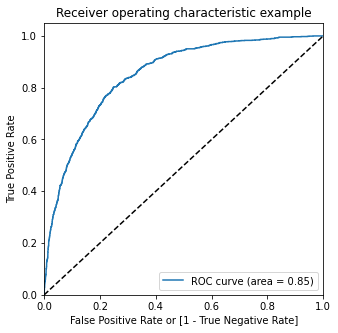

In [550]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Step 10: Finding Optimal Cutoff Point¶
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [551]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.218883,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.307681,5790,0,1,1,1,1,0,0,0,0,0,0
2,1,0.657601,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.542796,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.644673,2784,1,1,1,1,1,1,1,1,0,0,0


In [552]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.618651  0.944056  0.503439
0.2   0.2  0.722064  0.850039  0.676754
0.3   0.3  0.773263  0.771562  0.773865
0.4   0.4  0.795205  0.652681  0.845667
0.5   0.5  0.806583  0.539239  0.901238
0.6   0.6  0.803332  0.399378  0.946355
0.7   0.7  0.780983  0.212898  0.982118
0.8   0.8  0.749898  0.052836  0.996699
0.9   0.9  0.738521  0.000000  1.000000


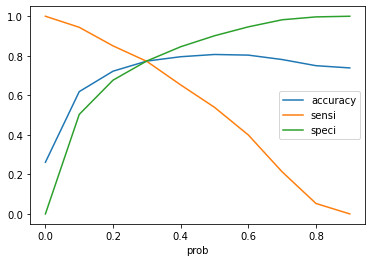

In [553]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [554]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.218883,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.307681,5790,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.657601,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.542796,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.644673,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [555]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7732629012596506

In [556]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2813,  822],
       [ 294,  993]], dtype=int64)

In [557]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [558]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7715617715617715

In [559]:
# Let us calculate specificity
TN / float(TN+FP)

0.7738651994497937

In [560]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22613480055020632


In [561]:
# Positive predictive value 
print (TP / float(TP+FP))

0.547107438016529


In [562]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9053749597682652


In [563]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3276,  359],
       [ 593,  694]], dtype=int64)

In [564]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6590693257359924

In [565]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5392385392385393

In [566]:
from sklearn.metrics import precision_score, recall_score

In [567]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [568]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6590693257359924

In [569]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5392385392385393

In [570]:
from sklearn.metrics import precision_recall_curve

In [571]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [572]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

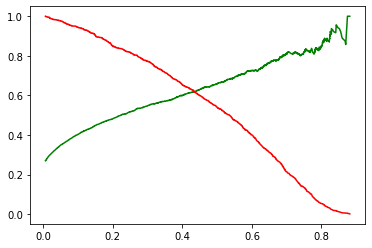

In [573]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Step 11: Making predictions on the test set

In [574]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [575]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,0,0,-0.347623,1,0.499951,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
3730,0,1,0,0.999203,1,1.319685,0,0,1,0,...,0,1,0,1,0,1,1,0,1,1
1761,0,0,0,1.040015,1,-1.342374,0,1,1,0,...,1,0,1,1,0,0,0,0,0,0
2283,0,0,0,-1.286319,1,0.223935,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0,1,1,0.346196,0,-1.500335,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [576]:
X_test_sm = sm.add_constant(X_test)

In [577]:
y_test_pred = res.predict(X_test_sm)

In [578]:
y_test_pred[:10]

942     0.434573
3730    0.285259
1761    0.011068
2283    0.595936
1872    0.013518
1970    0.718521
2532    0.290578
1616    0.009684
2485    0.646873
5914    0.112721
dtype: float64

In [579]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [580]:
# Let's see the head
y_pred_1.head()

,0
942,0.434573
3730,0.285259
1761,0.011068
2283,0.595936
1872,0.013518


In [581]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [582]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [583]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [584]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [585]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.434573
1,1,3730,0.285259
2,0,1761,0.011068
3,1,2283,0.595936
4,0,1872,0.013518


In [586]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [587]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [588]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.434573
1,1,3730,0.285259
2,0,1761,0.011068
3,1,2283,0.595936
4,0,1872,0.013518


In [589]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [590]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.434573,1
1,1,3730,0.285259,0
2,0,1761,0.011068,0
3,1,2283,0.595936,1
4,0,1872,0.013518,0


In [591]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7838862559241706

In [592]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1289,  239],
       [ 217,  365]], dtype=int64)

In [593]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [594]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.627147766323024

In [595]:
# Let us calculate specificity
TN / float(TN+FP)

0.8435863874345549